In [1]:
import os, random, matplotlib, pickle, yaml, tqdm
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob
from termcolor import colored

SMALL_SIZE, MEDIUM_SIZE = 9, 12

In [2]:
root_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
result_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU/results/round2_legs_antennae_resnet101"

with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])
    
config_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
np_loc_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU/data/global_loc/np"

key_list = []

all_loc_data = {}
fd_loc_data, fr_loc_data = {}, {}
min_loc_data, mid_loc_data, maj_loc_data = {}, {}, {}

for np_file in tqdm(glob(f"{np_loc_path}/*.npy")):
    key = os.path.basename(np_file).replace(".npy", "")
    key_list.append(key)

key_list.sort(key = lambda x: int(x[-12:]))

for key in key_list:
    np_file = f"{np_loc_path}/{key}.npy"
    
    if key[:-4] not in list(all_loc_data.keys()):
        all_loc_data[key[:-4]] = np.load(np_file)
        # specific category dataset
        if key.find("fd") != -1:
            fd_loc_data[key[:-4]] = np.load(np_file)
        if key.find("fr") != -1:
            fr_loc_data[key[:-4]] = np.load(np_file)
        if key.find("min") != -1:
            min_loc_data[key[:-4]] = np.load(np_file)
        if key.find("mid") != -1:
            mid_loc_data[key[:-4]] = np.load(np_file)
        if key.find("maj") != -1:
            maj_loc_data[key[:-4]] = np.load(np_file)
    else:
        all_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])
        # specific category dataset
        if key.find("fd") != -1:
            fd_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])
        if key.find("fr") != -1:
            fr_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])
        if key.find("min") != -1:
            min_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])
        if key.find("mid") != -1:
            mid_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])
        if key.find("maj") != -1:
            maj_loc_data[key[:-4]] = np.concatenate([all_loc_data[key[:-4]]  ,np.load(np_file)])

In [6]:
fr_concat_loc = np.concatenate(list(fr_loc_data.values()))
fd_concat_loc = np.concatenate(list(fd_loc_data.values()))

min_concat_loc = np.concatenate(list(min_loc_data.values()))
mid_concat_loc = np.concatenate(list(mid_loc_data.values()))
maj_concat_loc = np.concatenate(list(maj_loc_data.values()))

In [7]:
food_loc_center = (45, 20.5)
food_loc_radius = 3.4
arena_corner = np.min(fd_concat_loc, axis=0).tolist()
arena_width = (np.max(fd_concat_loc, axis=0) - np.min(fd_concat_loc, axis=0)).tolist()

def arena_figure():
    fig, ax = plt.subplots(figsize=(12,7))
    
    # Food Location
    food_circle = matplotlib.patches.Circle(food_loc_center,
                             food_loc_radius,
                             linewidth=2,edgecolor='g',facecolor='none')
    arena_rect = matplotlib.patches.Rectangle(arena_corner,
                             arena_width[0], arena_width[1],
                             linewidth=2,edgecolor='blue',facecolor='none', alpha=0.3)
    ax.add_patch(food_circle)
    ax.add_patch(arena_rect)
    
    ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location",
      xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
    
    return fig, ax

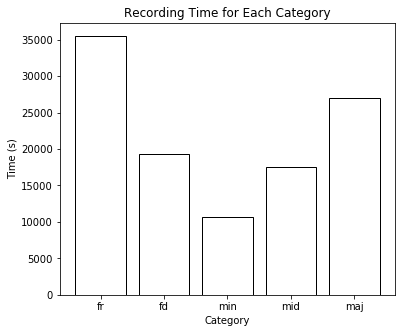

In [8]:
# Figure
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(('fr', 'fd', 'min', 'mid', 'maj'), 
       [len(fr_concat_loc)/config['fps'], len(fd_concat_loc)/config['fps'], len(min_concat_loc)/config['fps'], 
        len(mid_concat_loc)/config['fps'], len(maj_concat_loc)/config['fps']], 
       color='white', edgecolor='k')

ax.set(title="Recording Time for Each Category", xlabel="Category", ylabel="Time (s)")
plt.show()

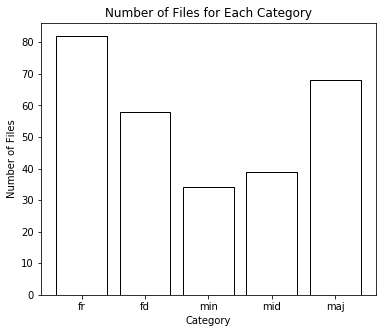

In [9]:
# Figure
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(('fr', 'fd', 'min', 'mid', 'maj'), 
       (len(fr_loc_data), len(fd_loc_data), len(min_loc_data), len(mid_loc_data), len(maj_loc_data)), 
       color='white', edgecolor='k')

ax.set(title="Number of Files for Each Category", xlabel="Category", ylabel="Number of Files")
plt.show()

<hr>
<hr>

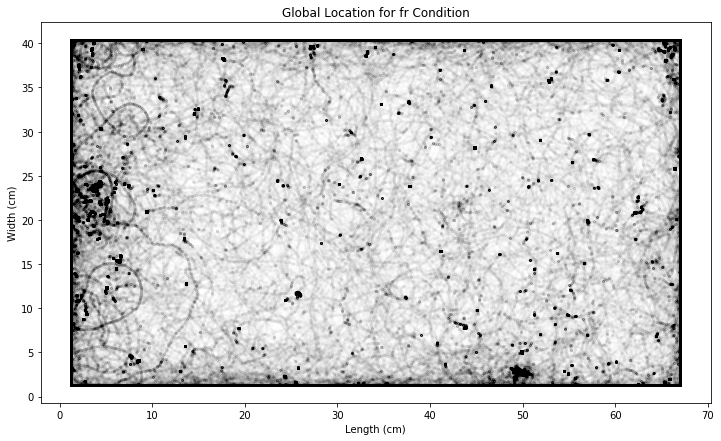

In [143]:
fr_concat_loc = np.concatenate(list(fr_loc_data.values()))
idx = (fr_concat_loc[:,0] == 1.25) & (fr_concat_loc[:,1] == 1.25)

fig_base, ax_base = plt.subplots(figsize=(12,7))
ax_base.scatter(fr_concat_loc[~idx,0], fr_concat_loc[~idx,1], s=7, c='k', alpha=0.005)
ax_base.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location for fr Condition")
plt.show()

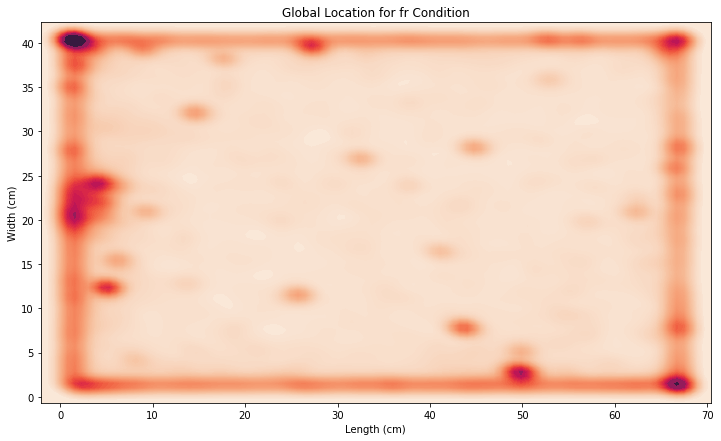

In [144]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(x=fr_concat_loc[~idx,0], y=fr_concat_loc[~idx,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='rocket_r', cbar=False, ax=ax)
# ax.scatter(macro_loc[random_idx,0], macro_loc[random_idx,1], s=7, c='k', alpha=0.5)
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location for fr Condition")
plt.show()

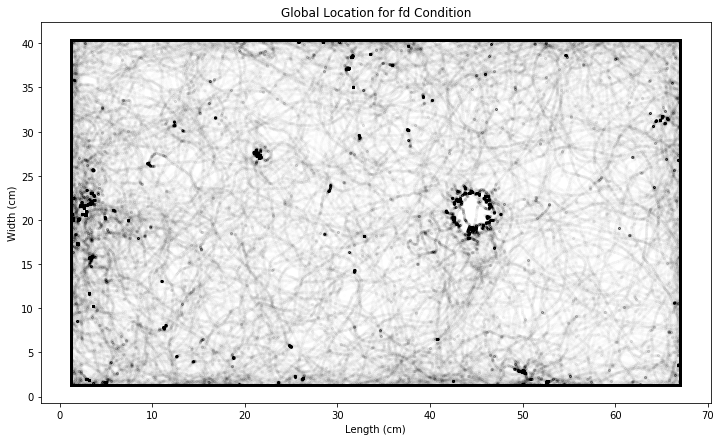

In [145]:
fd_concat_loc = np.concatenate(list(fd_loc_data.values()))
idx = (fd_concat_loc[:,0] == 1.25) & (fd_concat_loc[:,1] == 1.25)


fig_base, ax_base = plt.subplots(figsize=(12,7))
ax_base.scatter(fd_concat_loc[~idx,0], fd_concat_loc[~idx,1], s=7, c='k', alpha=0.005)
ax_base.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location for fd Condition")
plt.show()

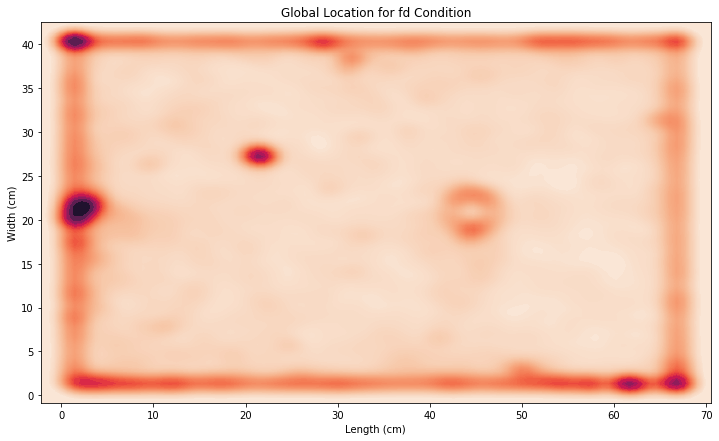

In [146]:
random_idx = random.sample(range(len(fd_concat_loc)), int(len(fd_concat_loc)*1/2))

fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(x=fd_concat_loc[~idx,0], y=fd_concat_loc[~idx,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='rocket_r', cbar=False, ax=ax)
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location for fd Condition")
plt.show()

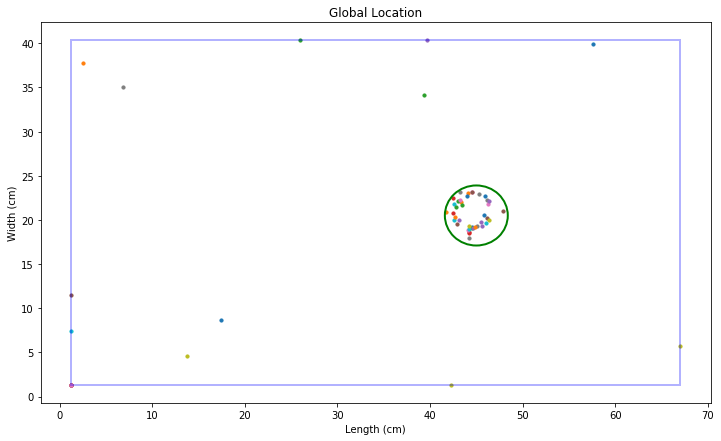

In [183]:
fig, ax = arena_figure()

for key, val in fd_loc_data.items():
    ax.scatter(val[-1,0], val[-1,1], s=10, alpha=1)
    
plt.show()

04AMmajfd_antmovie20092320: False
05ANmidfd_antmovie20092320: True
08AQmidfd_antmovie20092321: False
01Rdmidfd_antmovie20092419: False
02RRmajfd_antmovie20092419: False
03dRmajfd_antmovie20092420: True
04Ydmidfd_antmovie20092420: False
05YYmajfd_antmovie20092421: True
06dYmajfd_antmovie20092421: False
01Bdmidfd_antmovie20092620: True
02BBmidfd_antmovie20092620: True
03dBmidfd_antmovie20092620: True
04Ddminfd_antmovie20092620: True
05DDminfd_antmovie20092621: True
06dDminfd_antmovie20092621: True
07Wdmidfd_antmovie20092621: False
08WWmidfd_antmovie20092622: True
09dWminfd_antmovie20092622: True
01Pdminfd_antmovie20092719: False
02dPmajfd_antmovie20092720: True
03PPmajfd_antmovie20092720: True
04Tdminfd_antmovie20092720: True
06TTminfd_antmovie20092720: True
07Odmajfd_antmovie20092721: True
08dOminfd_antmovie20092721: True
09OOminfd_antmovie20092721: True
11RBminfd_antmovie20092722: True
12RWminfd_antmovie20092722: True
13RGmajfd_antmovie20092722: False
14RPminfd_antmovie20092723: True
1

NameError: name 'ax_base' is not defined

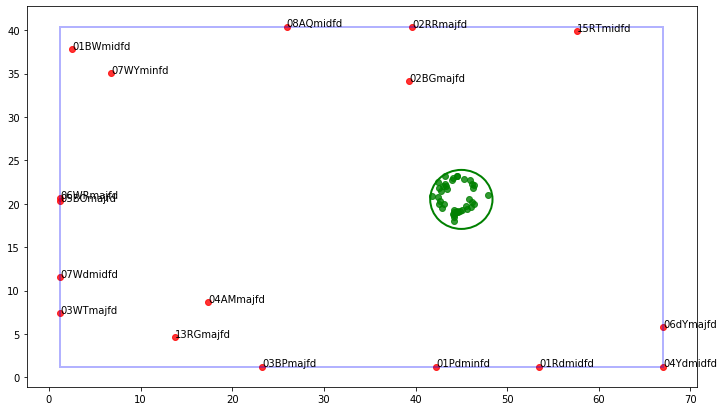

In [10]:
# food reached parameters
food_loc_xlim = (40,50)
food_loc_ylim = (15,25)
last_fr_buffer = 0

count_reach_food = 0
fig, ax = plt.subplots(figsize=(12,7))

# plot food location
food_circle = matplotlib.patches.Circle(food_loc_center,
                         food_loc_radius,
                         linewidth=2,edgecolor='g',facecolor='none')
arena_rect = matplotlib.patches.Rectangle(arena_corner,
                         arena_width[0], arena_width[1],
                         linewidth=2,edgecolor='blue',facecolor='none', alpha=0.3)
ax.add_patch(food_circle)
ax.add_patch(arena_rect)

# store list
success_list = []
fail_list = []

for key, val in fd_loc_data.items():
    (fr_idx, dim_idx) = np.where(val != 1.25)
    last_fr_idx = np.max(fr_idx)
    start_fr_idx = last_fr_idx - last_fr_buffer
    # confirm if reached food
    bool_xlim = (val[start_fr_idx:last_fr_idx+1,0] > food_loc_xlim[0]) & (val[start_fr_idx:last_fr_idx+1,0] < food_loc_xlim[1])
    bool_ylim = (val[start_fr_idx:last_fr_idx+1,1] > food_loc_ylim[0]) & (val[start_fr_idx:last_fr_idx+1,1] < food_loc_ylim[1])
    bool_xylim = bool_xlim & bool_ylim
    bool_reach_food = bool_xylim.any()
    
    # plot figures
    bool_color = ['g' if i else 'r' for i in bool_xylim]
    ax.scatter(val[start_fr_idx:last_fr_idx+1,0], val[start_fr_idx:last_fr_idx+1,1], c=bool_color, alpha=0.8)
    
    # output
    if bool_reach_food:
        print(f"{key}: {colored(bool_reach_food, 'green')}")
        count_reach_food += 1
        success_list.append(key)
    else:
        print(f"{key}: {colored(bool_reach_food, 'red')}")       
        ax.annotate( key.split('_')[0], (val[last_fr_idx,0], val[last_fr_idx,1]))
        fail_list.append(key)
        
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location (Last Frame)",
xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
plt.show()

# summary
print(f"{count_reach_food}/{len(fd_loc_data)} Reached Food")

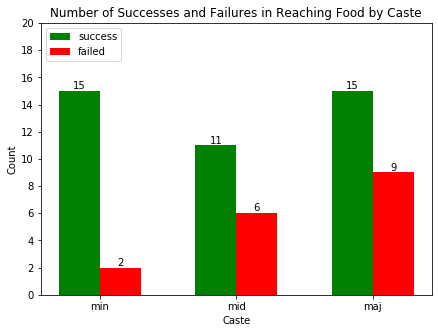

In [186]:
success_caste_list = [key[4:7] for key in success_list]
fail_caste_list = [key[4:7] for key in fail_list]

ind = np.arange(3)
width = 0.3

fig, ax = plt.subplots(figsize=(7,5))
bar1 = ax.bar(ind, (success_caste_list.count("min"), success_caste_list.count("mid"), success_caste_list.count("maj")), width, label="success", color='g')
bar2 = ax.bar(ind+width, (fail_caste_list.count("min"), fail_caste_list.count("mid"), fail_caste_list.count("maj")), width, label="failed", color='r')

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

ax.set(title="Number of Successes and Failures in Reaching Food by Caste", xlabel="Caste", ylabel="Count")
plt.xticks(ind + width / 2, ('min', 'mid', 'maj'))
plt.yticks(np.arange(0,22,2))
plt.legend(loc="upper left")
plt.show()

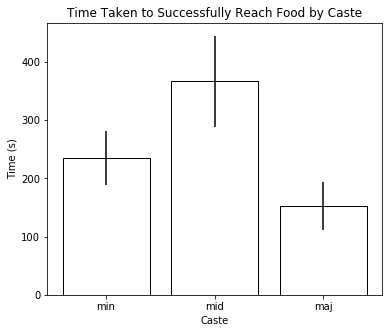

In [187]:
min_time, mid_time, maj_time = [], [], []
for key in success_list:
    if key.find("min") != -1:
        min_time.append( len(fd_loc_data[key])/(config['fps']) )
    elif key.find("mid") != -1:
        mid_time.append( len(fd_loc_data[key])/(config['fps']) )
    elif key.find("maj") != -1:
        maj_time.append( len(fd_loc_data[key])/(config['fps']) )

# Figure
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(('min', 'mid', 'maj'), (np.mean(min_time), np.mean(mid_time), np.mean(maj_time)), 
       yerr=[ np.std(min_time)/np.sqrt(len(min_time)), np.std(mid_time)/np.sqrt(len(mid_time)), np.std(maj_time)/np.sqrt(len(maj_time)) ], 
       color='white', edgecolor='k')

ax.set(title="Time Taken to Successfully Reach Food by Caste", xlabel="Caste", ylabel="Time (s)")
plt.show()

# Perforamnce in reaching food throughout day

In [199]:
success_MMDD = [i[-6:-2] for i in success_list]
fail_MMDD = [i[-6:-2] for i in fail_list]
unique_MMDD = np.unique(success_MMDD+fail_MMDD)

success_MMDD_count = []
fail_MMDD_count = []

for MMDD in unique_MMDD:
    success_MMDD_count.append( success_MMDD.count(MMDD) )
    fail_MMDD_count.append( fail_MMDD.count(MMDD) )

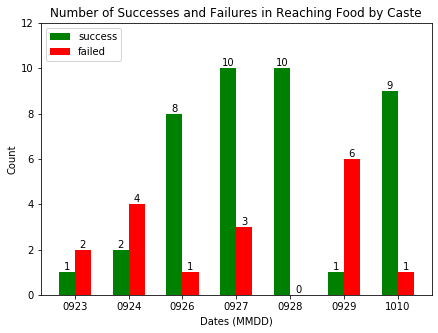

In [203]:
ind = np.arange(len(unique_MMDD))
width = 0.3

fig, ax = plt.subplots(figsize=(7,5))
bar1 = ax.bar(ind, success_MMDD_count, width, label="success", color='g')
bar2 = ax.bar(ind+width, fail_MMDD_count, width, label="failed", color='r')

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

ax.set(title="Number of Successes and Failures in Reaching Food by Caste", xlabel="Dates (MMDD)", ylabel="Count")
plt.xticks(ind + width / 2, unique_MMDD)
plt.yticks(np.arange(0,13,2))
plt.legend(loc="upper left")
plt.show()

# Wall hugging behavior between caste

In [238]:
buffer = 0.5 # unit: cm
arena_min = np.min(fd_concat_loc, axis=0)
arena_max = np.max(fd_concat_loc, axis=0)

def idx_wall_hugging(loc):
    return (loc[:,0]<=arena_min[0]+buffer) | \
        (loc[:,1]<=arena_min[1]+buffer) | \
        (loc[:,0]>=arena_max[0]-buffer) | \
        (loc[:,1]>=arena_max[1]-buffer)

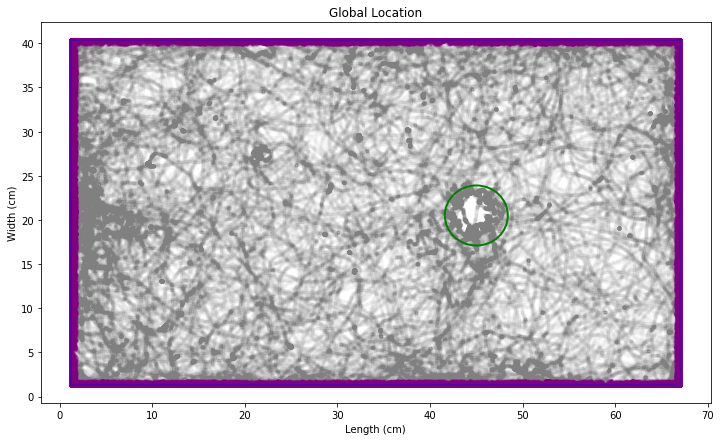

Wall Hugging: 46.10820778275754%


In [239]:
fd_concat_loc = np.concatenate(list(fd_loc_data.values()))
fr_idx = idx_wall_hugging(fd_concat_loc)

fig, ax = arena_figure()
ax.scatter(fd_concat_loc[:,0], fd_concat_loc[:,1], c='gray', s=10, alpha=0.01)
ax.scatter(fd_concat_loc[fr_idx,0], fd_concat_loc[fr_idx,1], c='purple', s=10, alpha=0.1)
plt.show()

print(f"Wall Hugging: {len(np.where(fr_idx)[0])/len(fd_concat_loc) * 100}%")

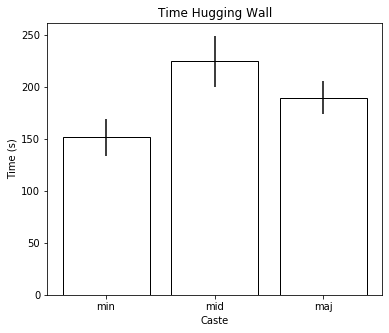

In [246]:
min_time, mid_time, maj_time = [], [], []
for key, val in min_loc_data.items():
    min_idx = idx_wall_hugging(val)
    min_time.append( len(np.where(min_idx)[0])/(config['fps']) )
for key, val in mid_loc_data.items():
    mid_idx = idx_wall_hugging(val)
    mid_time.append( len(np.where(mid_idx)[0])/(config['fps']) )
for key, val in maj_loc_data.items():
    maj_idx = idx_wall_hugging(val)
    maj_time.append( len(np.where(maj_idx)[0])/(config['fps']) )

# Figure
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(('min', 'mid', 'maj'), (np.mean(min_time), np.mean(mid_time), np.mean(maj_time)), 
       yerr=[ np.std(min_time)/np.sqrt(len(min_time)), np.std(mid_time)/np.sqrt(len(mid_time)), np.std(maj_time)/np.sqrt(len(maj_time)) ], 
       color='white', edgecolor='k')

ax.set(title="Time Hugging Wall", xlabel="Caste", ylabel="Time (s)")
plt.show()

# Wall Hugging Behaviors during Food Searching

41
17


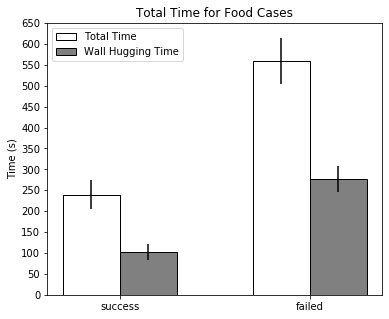

In [264]:
success_time, fail_time = [], []
success_wall_time, fail_wall_time = [], []

for key in success_list:
    success_time.append( len(fd_loc_data[key])/config['fps'] )
        
    idx = idx_wall_hugging(fd_loc_data[key])
    success_wall_time.append( len(np.where(idx)[0])/(config['fps']) )
    
for key in fail_list:
    fail_time.append( len(fd_loc_data[key])/config['fps'] )
    
    idx = idx_wall_hugging(fd_loc_data[key])
    fail_wall_time.append( len(np.where(idx)[0])/(config['fps']) )

print(len(success_wall_time))
print(len(fail_time))

ind = np.arange(2)
width = 0.3

# Figure
fig, ax = plt.subplots(figsize=(6,5))
bar1 = ax.bar(ind, (np.mean(success_time), np.mean(fail_time)), width,
       yerr=[ np.std(success_time)/np.sqrt(len(success_time)),
             np.std(fail_time)/np.sqrt(len(fail_time)) ], 
       color='white', edgecolor='k', label="Total Time")

bar2 = ax.bar(ind+width, (np.mean(success_wall_time), np.mean(fail_wall_time)), width,
       yerr=[ np.std(success_wall_time)/np.sqrt(len(success_wall_time)),
             np.std(fail_wall_time)/np.sqrt(len(fail_wall_time)) ], 
       color='gray', edgecolor='k', label="Wall Hugging Time")

for rect in bar1 + bar2:
    height = rect.get_height()

ax.set(title="Total Time for Food Cases", xlabel="", ylabel="Time (s)")
plt.xticks(ind + width / 2, ("success", "failed"))
plt.yticks(np.arange(0,700,50))
plt.legend(loc="upper left")
plt.show()


# For the successful fd ants, at what point do the ant head towards the food?

In [11]:
success_list

['05ANmidfd_antmovie20092320',
 '03dRmajfd_antmovie20092420',
 '05YYmajfd_antmovie20092421',
 '01Bdmidfd_antmovie20092620',
 '02BBmidfd_antmovie20092620',
 '03dBmidfd_antmovie20092620',
 '04Ddminfd_antmovie20092620',
 '05DDminfd_antmovie20092621',
 '06dDminfd_antmovie20092621',
 '08WWmidfd_antmovie20092622',
 '09dWminfd_antmovie20092622',
 '02dPmajfd_antmovie20092720',
 '03PPmajfd_antmovie20092720',
 '04Tdminfd_antmovie20092720',
 '06TTminfd_antmovie20092720',
 '07Odmajfd_antmovie20092721',
 '08dOminfd_antmovie20092721',
 '09OOminfd_antmovie20092721',
 '11RBminfd_antmovie20092722',
 '12RWminfd_antmovie20092722',
 '14RPminfd_antmovie20092723',
 '01ROmidfd_antmovie20092819',
 '02YRminfd_antmovie20092819',
 '03YBmajfd_antmovie20092820',
 '04YWmajfd_antmovie20092820',
 '05YGminfd_antmovie20092820',
 '06YPmajfd_antmovie20092821',
 '07YTminfd_antmovie20092821',
 '08YOmidfd_antmovie20092821',
 '09BRmajfd_antmovie20092822',
 '10BYmidfd_antmovie20092822',
 '04BTmajfd_antmovie20092920',
 '02WPmi

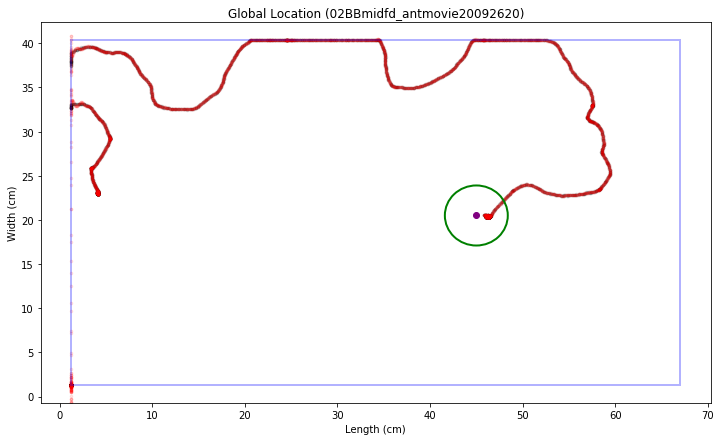

In [148]:
from scipy import signal

key = "02BBmidfd_antmovie20092620"
test_fd_loc = fd_loc_data[key]

filt_fd_loc = np.zeros(test_fd_loc.shape)
b, a = signal.butter(8, 0.1)
for i in range(2):
    filt_fd_loc[:,i] = signal.filtfilt(b, a, test_fd_loc[:,i])

fig, ax = arena_figure()
ax.scatter(test_fd_loc[:,0], test_fd_loc[:,1], c='k', s=7, alpha=0.1)
ax.scatter(filt_fd_loc[:,0], filt_fd_loc[:,1], c='r', s=7, alpha=0.1)
ax.scatter(food_loc_center[0], food_loc_center[1], c='purple')
ax.set(title=f"Global Location ({key})")
plt.show()

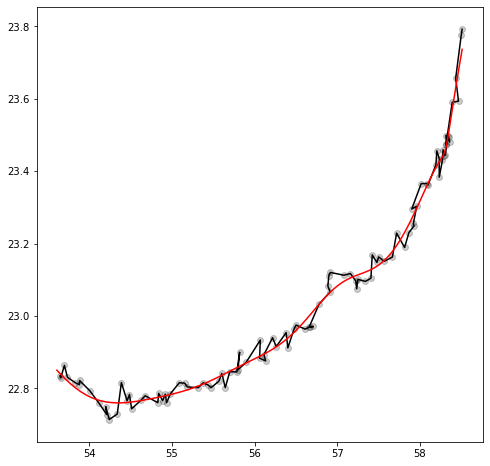

In [173]:
start_fr, stop_fr = -700, -600
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(test_fd_loc[start_fr:stop_fr, 0], test_fd_loc[start_fr:stop_fr, 1], c='k', alpha=0.2)
ax.plot(test_fd_loc[start_fr:stop_fr, 0], test_fd_loc[start_fr:stop_fr, 1], c='k')
ax.plot(filt_fd_loc[start_fr:stop_fr, 0], filt_fd_loc[start_fr:stop_fr, 1], c='r')
plt.show()

In [133]:
orientation_vector = np.diff(filt_fd_loc, axis=0)
food_vector = food_loc_center - filt_fd_loc[:-1]

magn_orien = np.sqrt(np.sum(orientation_vector**2, axis=1))
magn_food = np.sqrt(np.sum(food_vector**2, axis=1))

angle = np.arccos(np.sum(orientation_vector * food_vector, axis=1)/(magn_orien*magn_food))

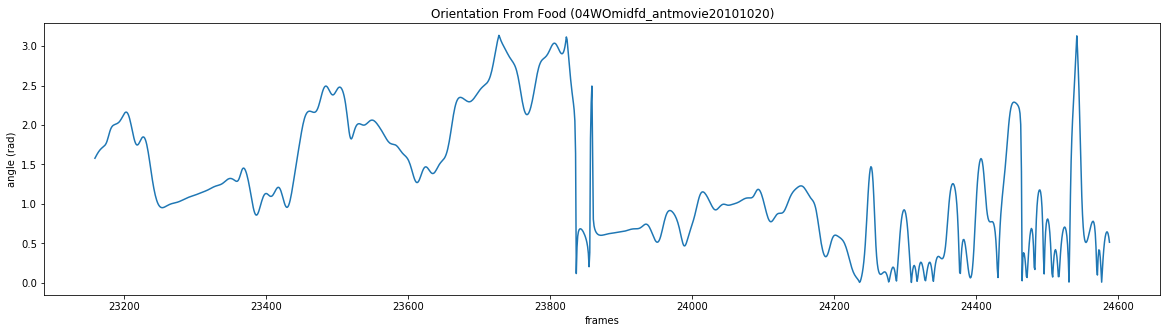

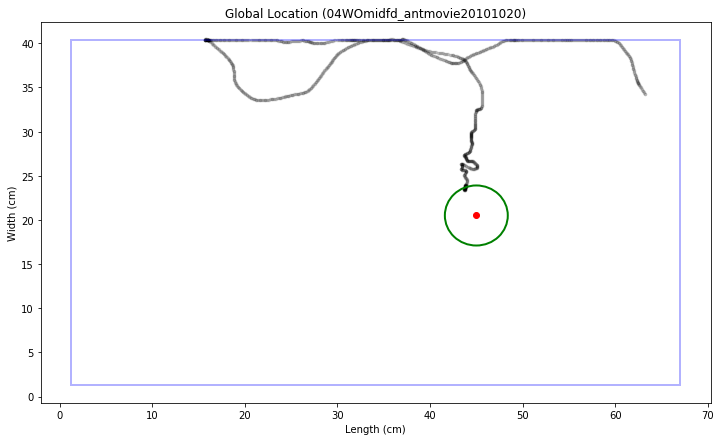

In [134]:
start_idx, stop_idx = -2000, -570

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.arange(len(angle)+start_idx, len(angle)+stop_idx), angle[start_idx:stop_idx])
ax.set(xlabel="frames", ylabel="angle (rad)", title=f"Orientation From Food ({key})")
plt.show()

fig, ax = arena_figure()
ax.scatter(filt_fd_loc[start_idx:stop_idx,0], filt_fd_loc[start_idx:stop_idx,1], c='k', s=7, alpha=0.1)
ax.scatter(food_loc_center[0], food_loc_center[1], c='r')
ax.set(title=f"Global Location ({key})")
plt.show()

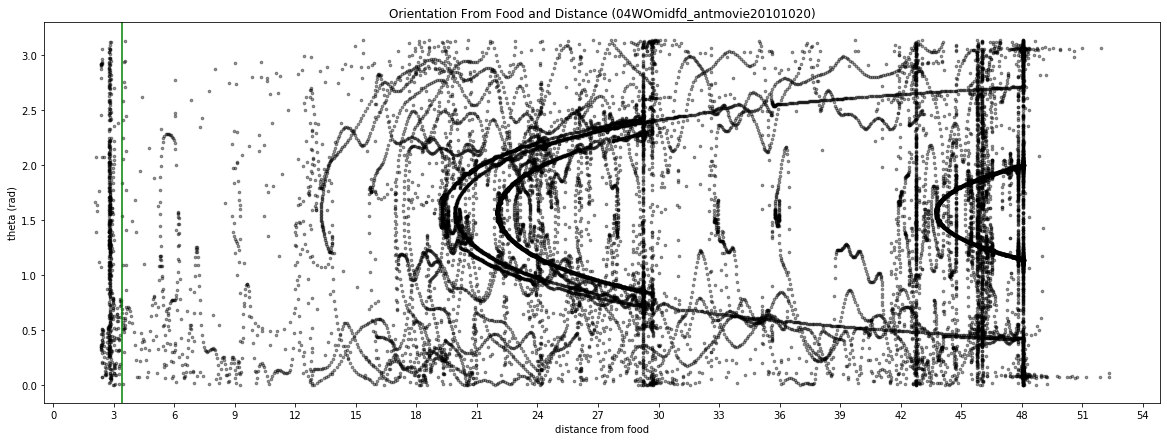

In [135]:
dist_food = np.sqrt(np.sum(food_vector**2, axis=1))

fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(dist_food, angle, s=7, c='k', alpha=0.4)
ax.axvline(food_loc_radius, c='g')
ax.set(ylabel="theta (rad)", xlabel="distance from food", title=f"Orientation From Food and Distance ({key})", xticks=np.arange(0,55,3))
plt.show()